<h1><center>  Linear Regression - Prediction using Supervised ML </center></h1>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
len(df)

25

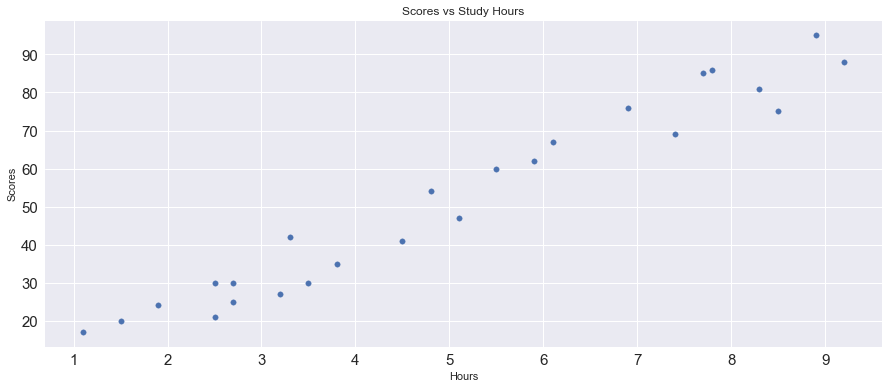

In [146]:
df.plot.scatter(x='Hours',y='Scores',figsize=(15,6),title='Scores vs Study Hours',fontsize=15,s=30);

In [8]:
lin = LinearRegression()

In [105]:
list(range(0,11)).append(9.25)

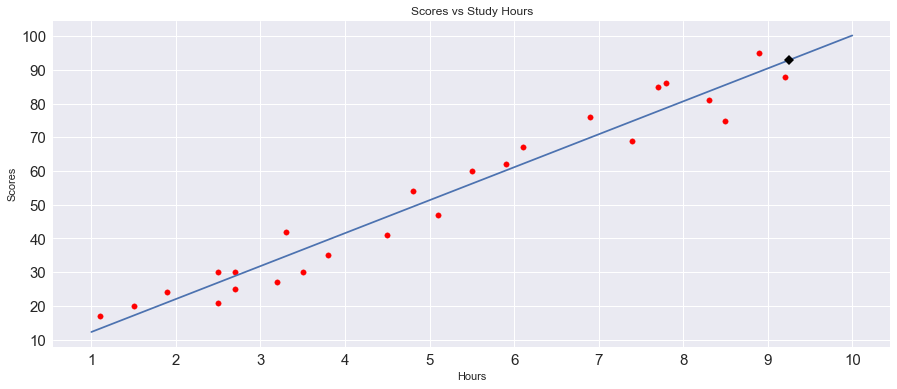

					Score for 9.25 hours of study: [92.91]



In [166]:
lin.fit(df.Hours.values.reshape(-1, 1),df.Scores.values)
df.plot.scatter(x='Hours',y='Scores',figsize=(15,6),title='Scores vs Study Hours',fontsize=15,s=30,c='r');
plt.plot( [1,10] , lin.predict([[1],[10]]) );
plt.xticks(range(1,11))
plt.yticks(range(0,101,10))
pred = lin.predict([[9.25]])
plt.plot(9.25,pred[0],'kD')
plt.show()
print('\t\t\t\t\t\033[4mScore for 9.25 hours of study\033[0m: \033[1m{}\033[0m\n'.format( np.round(pred,3) ))


Scores for 9.25 hours of study (100 iterations): 
[94.11 90.35 93.03 93.66 92.54 91.21 90.93 95.71 95.95 92.86 91.1  92.4
 93.53 90.63 97.71 97.07 92.56 94.56 91.96 92.13 93.69 90.34 92.87 89.89
 93.35 96.77 92.12 96.58 91.53 92.39 92.36 95.66 91.62 93.87 96.96 96.06
 92.49 92.58 95.04 86.96 91.51 94.25 95.64 92.63 91.34 93.6  89.27 94.84
 92.01 92.14 91.18 92.36 92.23 96.13 93.07 93.38 95.55 94.11 94.38 95.62
 93.41 91.15 91.45 86.89 93.67 86.71 95.89 91.37 93.29 92.18 93.14 89.4
 92.85 94.27 91.58 90.99 89.51 88.8  89.98 95.93 90.64 93.55 92.18 94.25
 95.89 92.16 87.44 92.21 94.83 92.27 95.88 92.1  88.94 91.54 91.24 92.54
 92.1  94.03 93.29 89.49]

Average score for 9.25 hours of study (100 iterations): 92.71

Standard deviation of score for 9.25 hours of study (100 iterations): 2.29

Minimum score for 9.25 hours of study (100 iterations): 86.71

Maximum score for 9.25 hours of study (100 iterations): 97.71


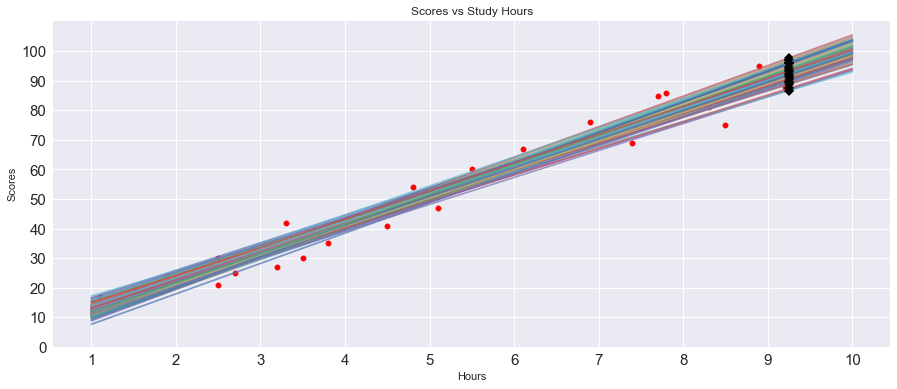

In [176]:
scores = []
df.plot.scatter(x='Hours',y='Scores',figsize=(15,6),title='Scores vs Study Hours',fontsize=15,s=30,c='r');
for i in range(100):    
    temp = df.sample(frac=1,replace=True)
    lin.fit(temp.Hours.values.reshape(-1, 1),temp.Scores.values)
    scores.append(lin.predict([[9.25]])[0])
    plt.plot( [1,10] , lin.predict([[1],[10]]) ,alpha=0.7 )
    plt.plot(9.25,scores[i],'kD');
plt.xticks(range(1,11))
plt.yticks(range(0,101,10))    
average = np.mean(scores)
stdev = np.std(scores)
print('\n\033[4mScores for 9.25 hours of study ({} iterations)\033[0m: \n{}'.format( i+1 , np.round(scores,2) ))
print('\n\033[4mAverage score for 9.25 hours of study ({} iterations)\033[0m: \033[1m{}\033[0m'.format( i+1 , np.round(average,2) ))
print('\n\033[4mStandard deviation of score for 9.25 hours of study ({} iterations)\033[0m: \033[1m{}\033[0m'.format( i+1 , np.round(stdev,2) ))
print('\n\033[4mMinimum score for 9.25 hours of study ({} iterations)\033[0m: \033[1m{}\033[0m'.format( i+1 , np.round(np.min(scores),2) ))  
print('\n\033[4mMaximum score for 9.25 hours of study ({} iterations)\033[0m: \033[1m{}\033[0m'.format( i+1 , np.round(np.max(scores),2) ))  


Mean score for 9.25 hours of study (1000 trials): 93.02

Median score for 9.25 hours of study (1000 trials): 93.02

Mode score for 9.25 hours of study (1000 trials): 93.02

Standard deviation of score for 9.25 hours of study (1000 trials): 0.01


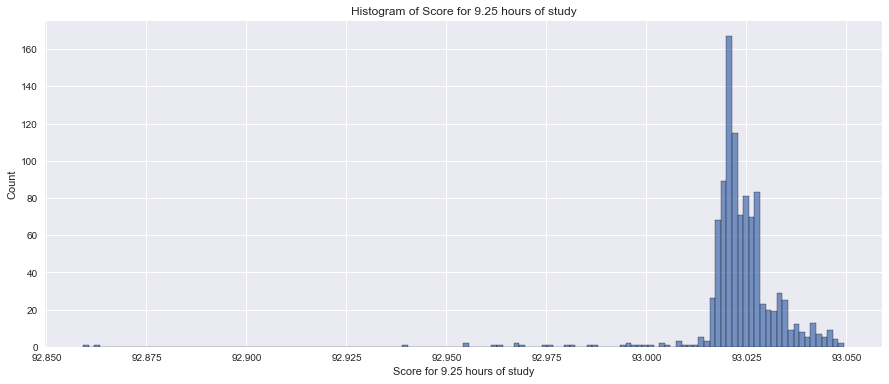

In [168]:
scores = []
means = []
for j in range(1000):
    for i in range(100):    
        temp = df.sample(frac=1,replace=True)
        lin.fit(temp.Hours.values.reshape(-1, 1),temp.Scores.values)
        scores.append(lin.predict([[9.25]])[0])
    average = np.mean(scores)
    means.append(average)
   
print('\n\033[4mMean score for 9.25 hours of study ({} trials)\033[0m: \033[1m{}\033[0m'.format( j+1 , np.round(np.mean(means),2) ))
print('\n\033[4mMedian score for 9.25 hours of study ({} trials)\033[0m: \033[1m{}\033[0m'.format( j+1 , np.round(np.median(means),2) ))
print('\n\033[4mMode score for 9.25 hours of study ({} trials)\033[0m: \033[1m{}\033[0m'.format( j+1 , stats.mode(np.round(means,2))[0][0] ))
print('\n\033[4mStandard deviation of score for 9.25 hours of study ({} trials)\033[0m: \033[1m{}\033[0m'.format( j+1 , np.round(np.std(means),2) ))
plt.figure(figsize=(15,6))
sns.histplot(means)
plt.title('Histogram of Score for 9.25 hours of study')
plt.xlabel('Score for 9.25 hours of study');   